In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
from random import randint


In [2]:
gspc_df = pd.read_csv('^GSPC.csv')
gspc_df['Date'] = pd.to_datetime(gspc_df['Date'])

cut_off_date = '2010-01-01' 
gspc_df = gspc_df[gspc_df['Date'] >= cut_off_date]


gspc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
7529,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
7530,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
7531,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
7532,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
7533,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [3]:
# take random sets of sequential rows 
new_set = []
for row_set in range(0, 100000):
    if row_set%2000==0: print(row_set)
    row_quant = randint(10, 30)
    row_start = randint(0, len(gspc_df)-row_quant)
    market_subset = gspc_df.iloc[row_start:row_start+row_quant]

    Close_Date = max(market_subset['Date'])
    if row_set%2000==0: print(Close_Date)
    
    # Close_Gap = (market_subset['Close'] - market_subset['Close'].shift(1)) / market_subset['Close'].shift(1)
    Close_Gap = market_subset['Close'].pct_change()
    High_Gap = market_subset['High'].pct_change()
    Low_Gap = market_subset['Low'].pct_change() 
    Volume_Gap = market_subset['Volume'].pct_change() 
    Daily_Change = (market_subset['Close'] - market_subset['Open']) / market_subset['Open']
    Outcome_Next_Day_Direction = (market_subset['Volume'].shift(-1) - market_subset['Volume'])
    
    new_set.append(pd.DataFrame({'Sequence_ID':[row_set]*len(market_subset),
                            'Close_Date':[Close_Date]*len(market_subset),
                           'Close_Gap':Close_Gap,
                           'High_Gap':High_Gap,
                           'Low_Gap':Low_Gap,
                           'Volume_Gap':Volume_Gap,
                           'Daily_Change':Daily_Change,
                           'Outcome_Next_Day_Direction':Outcome_Next_Day_Direction}))


0
2017-12-06 00:00:00
2000
2020-06-18 00:00:00
4000
2016-07-19 00:00:00
6000
2016-06-15 00:00:00
8000
2012-12-19 00:00:00
10000
2010-01-20 00:00:00
12000
2017-06-19 00:00:00
14000
2016-07-19 00:00:00
16000
2017-08-10 00:00:00
18000
2016-06-08 00:00:00
20000
2018-06-29 00:00:00
22000
2014-08-21 00:00:00
24000
2019-03-27 00:00:00
26000
2015-01-14 00:00:00
28000
2014-08-01 00:00:00
30000
2016-09-07 00:00:00
32000
2017-09-18 00:00:00
34000
2016-07-18 00:00:00
36000
2015-10-01 00:00:00
38000
2017-04-21 00:00:00
40000
2015-04-22 00:00:00
42000
2016-02-23 00:00:00
44000
2018-11-19 00:00:00
46000
2017-11-08 00:00:00
48000
2016-07-25 00:00:00
50000
2011-08-17 00:00:00
52000
2010-11-04 00:00:00
54000
2010-10-06 00:00:00
56000
2018-02-05 00:00:00
58000
2016-02-08 00:00:00
60000
2020-06-08 00:00:00
62000
2016-09-29 00:00:00
64000
2010-06-16 00:00:00
66000
2020-03-02 00:00:00
68000
2018-07-05 00:00:00
70000
2018-10-31 00:00:00
72000
2019-06-14 00:00:00
74000
2010-08-30 00:00:00
76000
2015-11-11 00:

In [5]:
len(market_subset)

20

In [18]:
new_set_df = pd.concat(new_set)
print(new_set_df.shape)
new_set_df = new_set_df.dropna(how='any') 
print(new_set_df.shape)
new_set_df.tail(20)

(1997219, 8)
(1797219, 8)


,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
9544,99998,2018-01-08,0.004029,0.005497,0.007895,0.044254,0.001721,-458640000.0
9545,99998,2018-01-08,0.007034,0.005188,0.003255,-0.124116,0.004327,6030000.0
9480,99999,2017-10-27,0.002159,0.002333,0.003353,-0.040903,0.001676,-51730000.0
9481,99999,2017-10-27,0.001247,0.002130,0.001167,-0.016856,0.001681,28000000.0
9482,99999,2017-10-27,0.005647,0.004716,0.003247,0.009280,0.004412,-160550000.0
9483,99999,2017-10-27,-0.001074,-0.001215,0.001484,-0.052724,0.000742,-400600000.0
9484,99999,2017-10-27,-0.001804,0.000945,-0.000861,-0.138877,-0.002610,476530000.0
9485,99999,2017-10-27,0.002322,0.001336,0.001283,0.191842,0.000255,15590000.0
9486,99999,2017-10-27,0.001804,0.000004,0.001214,0.005266,0.001811,175420000.0
9487,99999,2017-10-27,-0.001687,0.000035,0.000141,0.058943,-0.000764,-2070000.0


In [20]:
new_set_df.head()

,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
9512,0,2017-12-06,0.008196,0.006705,0.006061,-0.069173,0.004932,-1.255000e+07
9513,0,2017-12-06,-0.002626,-0.002367,0.001815,-0.003788,-0.001583,-2.966200e+08
9514,0,2017-12-06,0.001276,0.000263,0.000240,-0.089880,0.001027,3.291800e+08
9515,0,2017-12-06,0.006541,0.006403,0.004239,0.109597,0.003808,-5.697700e+08
9516,0,2017-12-06,-0.000750,-0.000096,0.002341,-0.170962,-0.001242,-1.413170e+09


In [21]:
# confirm sequence
# new_set_df[new_set_df['Close_Date'] == '1973-06-27'] {HLH, HLH, HHH, HHH, LLL, LML, LML, LLL, LHL, ...

In [22]:
# create sequences
# simplify the data by binning values into three groups
 
# Close_Gap
new_set_df['Close_Gap_LMH'] = pd.qcut(new_set_df['Close_Gap'], 3, labels=["L", "M", "H"])

# High_Gap - not used in this example
new_set_df['High_Gap_LMH'] = pd.qcut(new_set_df['High_Gap'], 3, labels=["L", "M", "H"])

# Low_Gap - not used in this example
new_set_df['Low_Gap_LMH'] = pd.qcut(new_set_df['Low_Gap'], 3, labels=["L", "M", "H"])

# Volume_Gap
new_set_df['Volume_Gap_LMH'] = pd.qcut(new_set_df['Volume_Gap'], 3, labels=["L", "M", "H"])
 
# Daily_Change
new_set_df['Daily_Change_LMH'] = pd.qcut(new_set_df['Daily_Change'], 3, labels=["L", "M", "H"])

# new set
new_set_df = new_set_df[["Sequence_ID", 
                         "Close_Date", 
                         "Close_Gap_LMH", 
                         "Volume_Gap_LMH", 
                         "Daily_Change_LMH", 
                         "Outcome_Next_Day_Direction"]]

new_set_df['Event_Pattern'] = new_set_df['Close_Gap_LMH'].astype(str) + new_set_df['Volume_Gap_LMH'].astype(str) + new_set_df['Daily_Change_LMH'].astype(str)
 

In [23]:
new_set_df

,Sequence_ID,Close_Date,Close_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH,Outcome_Next_Day_Direction,Event_Pattern
9512,0,2017-12-06,H,L,H,-1.255000e+07,HLH
9513,0,2017-12-06,L,M,M,-2.966200e+08,LMM
9514,0,2017-12-06,M,L,M,3.291800e+08,MLM
9515,0,2017-12-06,H,H,H,-5.697700e+08,HHH
9516,0,2017-12-06,M,L,M,-1.413170e+09,MLM
...,...,...,...,...,...,...,...
9493,99999,2017-10-27,H,H,H,-1.729400e+08,HHH
9494,99999,2017-10-27,L,L,L,2.156200e+08,LLL
9495,99999,2017-10-27,M,H,M,4.471800e+08,MHM
9496,99999,2017-10-27,L,H,L,-5.460000e+06,LHL


In [27]:
new_set_df['Outcome_Next_Day_Direction'].describe()

count    1.797219e+06
mean     5.202222e+05
std      6.985226e+08
min     -4.995080e+09
25%     -2.966200e+08
50%     -9.270000e+06
75%      3.171300e+08
max      4.299510e+09
Name: Outcome_Next_Day_Direction, dtype: float64

In [30]:
# reduce the set
compressed_set = new_set_df.groupby(['Sequence_ID',
                                     'Close_Date'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

print(compressed_set.shape)
compressed_set.head() 
    

(100000, 3)


,Sequence_ID,Close_Date,Event_Pattern
0,0,2017-12-06,"{HLH, LMM, MLM, HHH, MLM, MLM, MHM, HHH, MHM, ..."
1,1,2012-07-30,"{LHL, LLL, MHL, LHL, MMM, LHL, HLH, LLL, HHH, ..."
2,2,2011-07-21,"{MHM, HLH, HHH, LLL, LHL, LLL, HLH, HHH, HHH, ..."
3,3,2014-11-13,"{LLL, HMH, HLH, MHM, HMH, MMM, HMH, HHH, MLM, ..."
4,4,2013-09-30,"{HMH, LML, HLH, HMM, LLL, LHL, MLM, MLM, LHL, ..."


In [35]:
#compressed_outcomes = new_set_df[['Sequence_ID', 'Close_Date', 'Outcome_Next_Day_Direction']].groupby(['Sequence_ID', 'Close_Date']).agg()

compressed_outcomes = new_set_df.groupby(['Sequence_ID', 'Close_Date'])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()

(100000, 3)


,Sequence_ID,Outcome_Next_Day_Direction
count,100000.000000,1.000000e+05
mean,49999.500000,5.506711e+05
std,28867.657797,6.820490e+07
min,0.000000,-5.168218e+08
25%,24999.750000,-2.830806e+07
50%,49999.500000,-6.886667e+05
75%,74999.250000,2.726600e+07
max,99999.000000,6.212562e+08


In [36]:
compressed_outcomes

,Sequence_ID,Close_Date,Outcome_Next_Day_Direction
0,0,2017-12-06,-6.439231e+06
1,1,2012-07-30,1.003176e+07
2,2,2011-07-21,-3.436087e+06
3,3,2014-11-13,-1.916625e+07
4,4,2013-09-30,1.123357e+07
...,...,...,...
99995,99995,2010-08-31,-3.147125e+07
99996,99996,2012-02-27,-2.286900e+07
99997,99997,2012-03-26,-2.013471e+07
99998,99998,2018-01-08,-3.213962e+07


In [39]:
#compressed_outcomes = new_set_df[['Sequence_ID', 'Close_Date', 'Outcome_Next_Day_Direction']].groupby(['Sequence_ID', 'Close_Date']).agg()

compressed_outcomes = new_set_df.groupby(['Sequence_ID', 'Close_Date'])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()

(100000, 3)


,Sequence_ID,Outcome_Next_Day_Direction
count,100000.000000,1.000000e+05
mean,49999.500000,5.506711e+05
std,28867.657797,6.820490e+07
min,0.000000,-5.168218e+08
25%,24999.750000,-2.830806e+07
50%,49999.500000,-6.886667e+05
75%,74999.250000,2.726600e+07
max,99999.000000,6.212562e+08


In [40]:
compressed_set = pd.merge(compressed_set, compressed_outcomes, on= ['Sequence_ID', 'Close_Date'], how='inner')
print(compressed_set.shape)
compressed_set.head()

(100000, 4)


,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2017-12-06,"{HLH, LMM, MLM, HHH, MLM, MLM, MHM, HHH, MHM, ...",-6.439231e+06
1,1,2012-07-30,"{LHL, LLL, MHL, LHL, MMM, LHL, HLH, LLL, HHH, ...",1.003176e+07
2,2,2011-07-21,"{MHM, HLH, HHH, LLL, LHL, LLL, HLH, HHH, HHH, ...",-3.436087e+06
3,3,2014-11-13,"{LLL, HMH, HLH, MHM, HMH, MMM, HMH, HHH, MLM, ...",-1.916625e+07
4,4,2013-09-30,"{HMH, LML, HLH, HMM, LLL, LHL, MLM, MLM, LHL, ...",1.123357e+07


In [41]:
# # reduce set 

# compressed_set = new_set_df.groupby(['Sequence_ID', 'Close_Date','Outcome_Next_Day_Direction'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

compressed_set['Event_Pattern'] = [''.join(e.split()).replace('{','')
                                   .replace('}','') for e in compressed_set['Event_Pattern'].values]
compressed_set.head()

,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2017-12-06,"HLH,LMM,MLM,HHH,MLM,MLM,MHM,HHH,MHM,HHH,LLM,MM...",-6.439231e+06
1,1,2012-07-30,"LHL,LLL,MHL,LHL,MMM,LHL,HLH,LLL,HHH,HMH,MHM,LM...",1.003176e+07
2,2,2011-07-21,"MHM,HLH,HHH,LLL,LHL,LLL,HLH,HHH,HHH,HMH,HLH,MM...",-3.436087e+06
3,3,2014-11-13,"LLL,HMH,HLH,MHM,HMH,MMM,HMH,HHH,MLM,LHL,HMH,HM...",-1.916625e+07
4,4,2013-09-30,"HMH,LML,HLH,HMM,LLL,LHL,MLM,MLM,LHL,HHM,HLH,ML...",1.123357e+07


In [46]:
# use last x days of data for validation
compressed_set_validation = compressed_set[compressed_set['Close_Date'] >= datetime.datetime.now() 
                                           - datetime.timedelta(days=90)] # Sys.Date()-90 

compressed_set_validation.shape

(2140, 4)

In [47]:
compressed_set = compressed_set[compressed_set['Close_Date'] < datetime.datetime.now() 
                                           - datetime.timedelta(days=90)]  
compressed_set.shape

(97860, 4)

In [48]:
list(compressed_set)

['Sequence_ID', 'Close_Date', 'Event_Pattern', 'Outcome_Next_Day_Direction']

In [49]:
# drop date field
compressed_set = compressed_set[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]
compressed_set_validation = compressed_set_validation[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]

In [51]:
compressed_set['Outcome_Next_Day_Direction'].describe()

count    9.786000e+04
mean     9.981455e+05
std      6.727659e+07
min     -5.168218e+08
25%     -2.748880e+07
50%     -4.132143e+05
75%      2.724632e+07
max      6.212562e+08
Name: Outcome_Next_Day_Direction, dtype: float64

In [52]:
print(len(compressed_set['Outcome_Next_Day_Direction']))
len(compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000])

97860


77709

In [53]:
# keep only big/interesting moves 
print('all moves:', len(compressed_set))
compressed_set = compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000]
compressed_set['Outcome_Next_Day_Direction'] = np.where((compressed_set['Outcome_Next_Day_Direction'] > 0), 1, 0)
compressed_set_validation['Outcome_Next_Day_Direction'] = np.where((compressed_set_validation['Outcome_Next_Day_Direction'] > 0), 1, 0)
print('big moves only:', len(compressed_set))

all moves: 97860
big moves only: 77709


<ipython-input-53-29114541ab75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compressed_set['Outcome_Next_Day_Direction'] = np.where((compressed_set['Outcome_Next_Day_Direction'] > 0), 1, 0)
<ipython-input-53-29114541ab75>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compressed_set_validation['Outcome_Next_Day_Direction'] = np.where((compressed_set_validation['Outcome_Next_Day_Direction'] > 0), 1, 0)


In [55]:
compressed_set.head()

,Sequence_ID,Event_Pattern,Outcome_Next_Day_Direction
1,1,"LHL,LLL,MHL,LHL,MMM,LHL,HLH,LLL,HHH,HMH,MHM,LM...",1
3,3,"LLL,HMH,HLH,MHM,HMH,MMM,HMH,HHH,MLM,LHL,HMH,HM...",0
4,4,"HMH,LML,HLH,HMM,LLL,LHL,MLM,MLM,LHL,HHM,HLH,ML...",1
5,5,"MHM,MLM,MMM,LLL,LHL,HLH,MMM,LHL,MLM,MMM,MMM,LM...",0
6,6,"HMM,HLH,LLL,HLH,HMH,HHH,LLM,LHL,LLL,MHL,LHL,HL...",0


In [60]:
# create two data sets - won/not won
compressed_set_pos = compressed_set[compressed_set['Outcome_Next_Day_Direction']==1][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_pos.shape)
compressed_set_neg = compressed_set[compressed_set['Outcome_Next_Day_Direction']==0][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_neg.shape)

(38401, 2)
(39308, 2)


In [67]:
flat_list = [item.split(',') for item in compressed_set['Event_Pattern'].values ]
unique_patterns = ','.join(str(r) for v in flat_list for r in v)
unique_patterns = list(set(unique_patterns.split(',')))
len(unique_patterns)

26

#### unique_patterns

In [70]:
compressed_set['Outcome_Next_Day_Direction'].head()      

1    1
3    0
4    1
5    0
6    0
Name: Outcome_Next_Day_Direction, dtype: int32

# Building the markov transition grid

In [73]:
compressed_set_pos

,Sequence_ID,Event_Pattern
1,1,"LHL,LLL,MHL,LHL,MMM,LHL,HLH,LLL,HHH,HMH,MHM,LM..."
4,4,"HMH,LML,HLH,HMM,LLL,LHL,MLM,MLM,LHL,HHM,HLH,ML..."
7,7,"MLM,MMM,MHM,HHH,MMH,HLH,MMM,MMM,HLH"
9,9,"MMM,MMM,MHM,MMM,MHL,HLH,LML,LML,HMH,MMM,LHL,ML..."
10,10,"MLH,MMH,MMM,HHH,MMM,LLL,LML,HHH,HHH,LLL,HMH,LH..."
...,...,...
99986,99986,"HMH,MLM,HLH,LHL,LHL,HLH,LHM,MLM,HMH,LHL,HMM,LM..."
99987,99987,"LHL,LHL,HLH,HMH,MLM,MMH,HLM,HMH,MLL,LML,LML,MML"
99989,99989,"LLL,HMH,HMM,HLH,HHH,MMM,HLH,MMM,MHM,HLH,LHL,LL..."
99994,99994,"HMH,HMH,MLM,MMM,LHL,HHH,HLH,LLL,LHM,HHH,MLM,LH..."


In [122]:
# build the markov transition grid
def build_transition_grid(compressed_grid, unique_patterns):
    # build the markov transition grid
#--------------------------------------------------------------------------------------------
#This portion of code will find the count of the occurence of the different pattern in the total given data
    patterns = []
    counts = []
    for from_event in unique_patterns:

        # how many times 
        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event # MMM,MlM

            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                found = Event_Pattern.count(pattern)
            patterns.append(pattern)
            counts.append(found)
#-----------------------------------------------------------------------------------------
    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})

    grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str
    grid_Df.head()

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')

    grid_Df.columns= [col for col in grid_Df.columns]
    grid_Df.index.name = None

    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    grid_Df.head()

    #grid_Df.rowSums(transition_dataframe) 
    grid_Df = grid_Df / grid_Df.sum(1)
    return (grid_Df)
 

In [123]:
grid_pos = build_transition_grid(compressed_set_pos, unique_patterns) 
grid_neg = build_transition_grid(compressed_set_neg, unique_patterns)

<ipython-input-122-99e1b7f4c16a>:25: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str


In [126]:
grid_pos.head()

,HHH,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,LHL,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
HHH,0.075838,0.058513,0.079752,0.930233,0.149637,0.103281,0.0,0.106682,0.0,0.030275,...,0.157810,0.024219,0.102661,0.051427,0.188815,0.021026,0.150054,0.095961,0.021282,0.111036
HHM,0.007245,0.000000,0.010072,0.000000,0.000000,0.020827,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.027255,0.014251,0.000000,0.019087,0.016704,0.000000,0.000000,0.006142
HLH,0.139528,0.127184,0.057292,0.000000,0.070369,0.096925,0.0,0.080143,0.0,0.114837,...,0.036204,0.152604,0.105127,0.083570,0.046903,0.073367,0.067487,0.092309,0.122692,0.106891
HLL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002014,0.000000,0.000000,0.000000
HLM,0.006858,0.011987,0.000000,0.000000,0.000000,0.003918,0.0,0.053498,0.0,0.010473,...,0.000000,0.000000,0.022453,0.010139,0.043295,0.000000,0.000000,0.022364,0.000000,0.014101


In [130]:
def safe_log(x,y):
    try:
        lg = np.log(x/y)
    except:
        lg = 0
    return lg

# predict on out of sample data
actual = []
predicted = []
for seq_id in compressed_set_validation['Sequence_ID'].values:
    patterns = compressed_set_validation[compressed_set_validation['Sequence_ID'] == seq_id]['Event_Pattern'].values[0].split(',')
    pos = []
    neg = []
    log_odds = []
    
    for id in range(0, len(patterns)-1):
        # get log odds
        # logOdds = log(tp(i,j) / tn(i,j)
        if (patterns[id] in list(grid_pos) and patterns[id+1] in list(grid_pos) and patterns[id] in list(grid_neg) and patterns[id+1] in list(grid_neg)):
                
            numerator = grid_pos[patterns[id]][patterns[id+1]]
            denominator = grid_neg[patterns[id]][patterns[id+1]]
            if (numerator == 0 and denominator == 0):
                log_value =0
            elif (denominator == 0):
                log_value = np.log(numerator / 0.00001)
            elif (numerator == 0):
                log_value = np.log(0.00001 / denominator)
            else:
                log_value = np.log(numerator/denominator)
        else:
            log_value = 0
        
        log_odds.append(log_value)
        
        pos.append(numerator)
        neg.append(denominator)
      
    #print('outcome:', compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    #print(sum(pos)/sum(neg))
    #print(sum(log_odds))

    actual.append(compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    predicted.append(sum(log_odds))

from sklearn.metrics import confusion_matrix

confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])

array([[ 154, 1194],
       [  88,  704]], dtype=int64)

In [131]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
print('Accuracy:', round(score * 100,2), '%')

Accuracy: 40.09 %


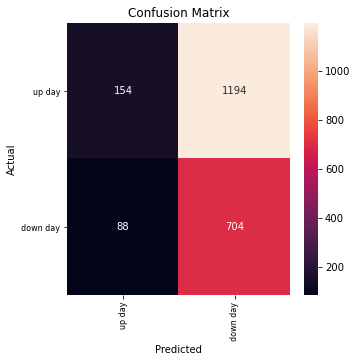

In [132]:
import seaborn as sns
cm = confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['up day','down day'])
ax.yaxis.set_ticklabels(['up day','down day'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()